In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bikers_df=pd.read_csv("day.csv")

below code generates scatter plots for each selected feature against the target variable ('cnt'). This visual representation helps in understanding the relationship between each feature and the target variable.
Scatter plots provides following details:

1.   Scatter plots show how selected features relate to the target variable, aiding in understanding data patterns.
2.   Scatter plots help identify features with clear linear trends, suitable for linear regression.
3. Outliers impacting regression can be spotted through scatter plots, guiding data cleaning efforts.

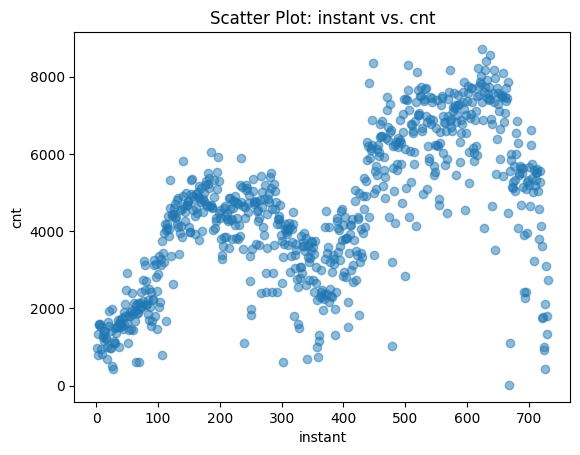

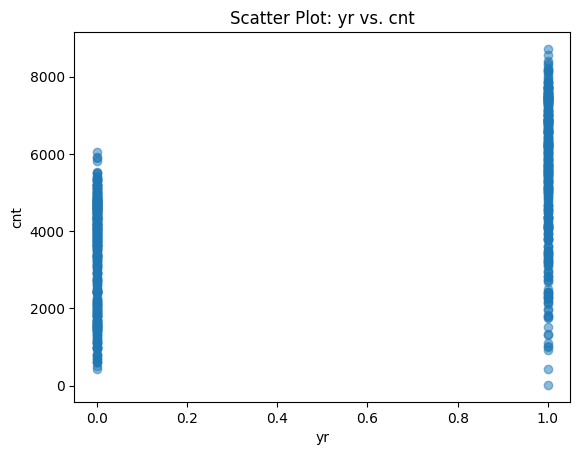

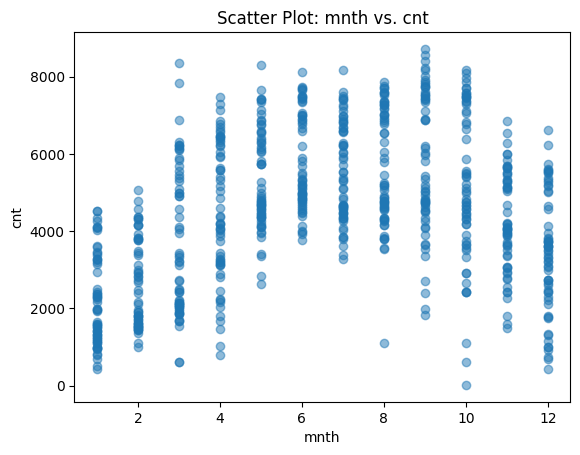

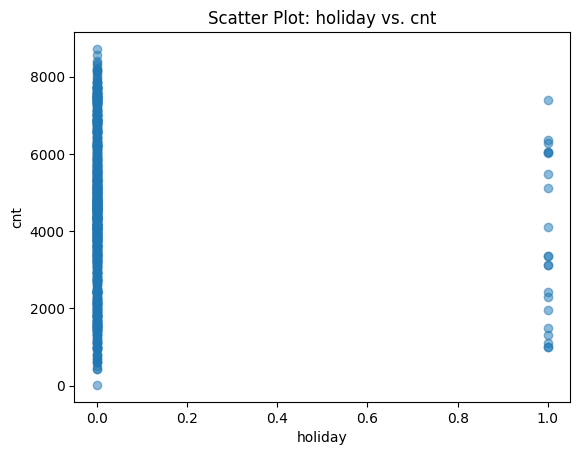

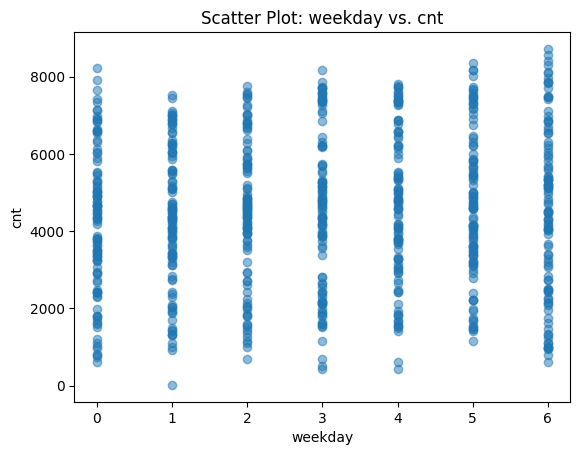

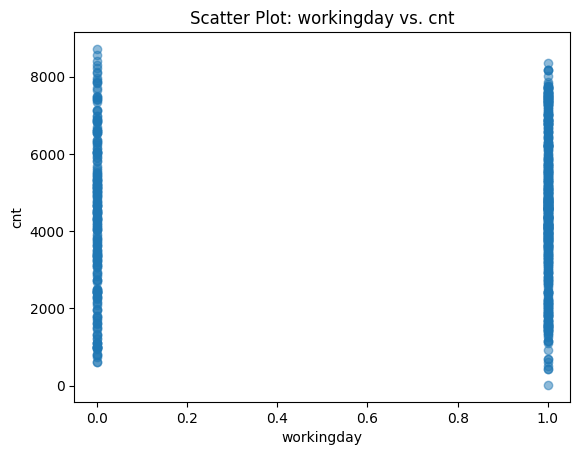

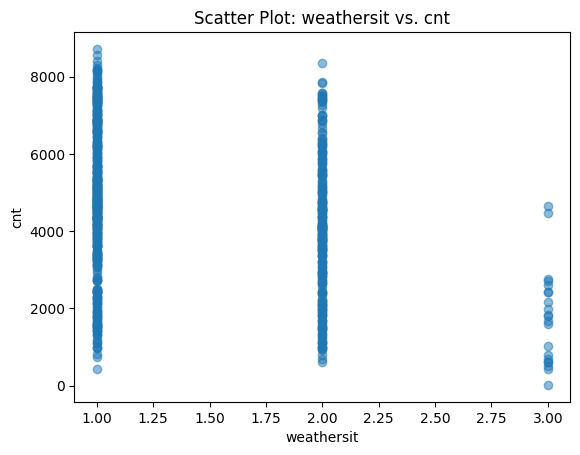

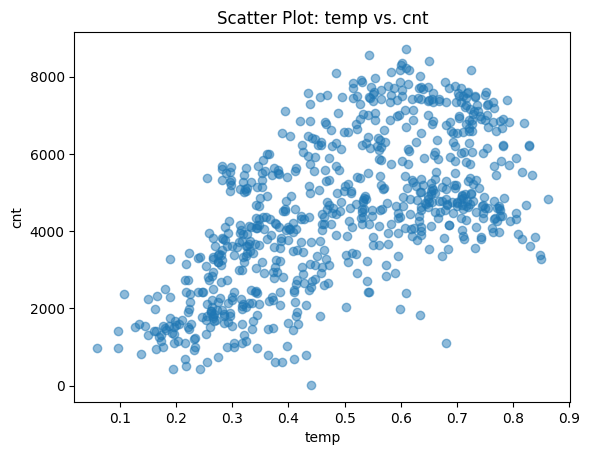

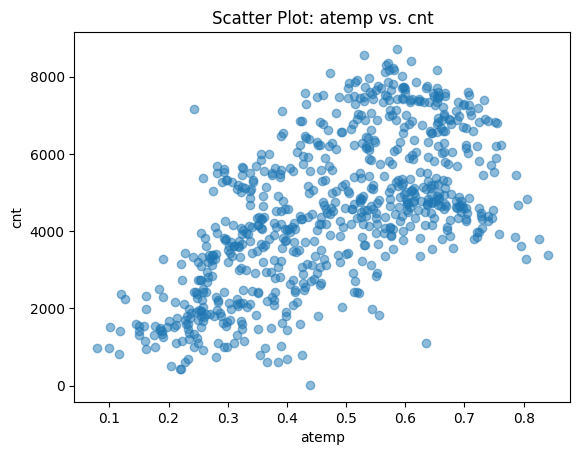

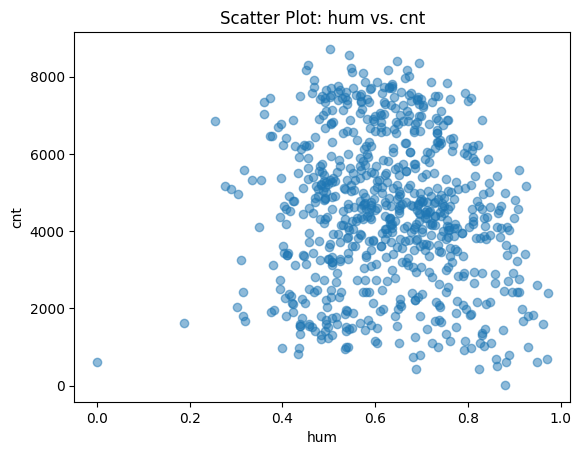

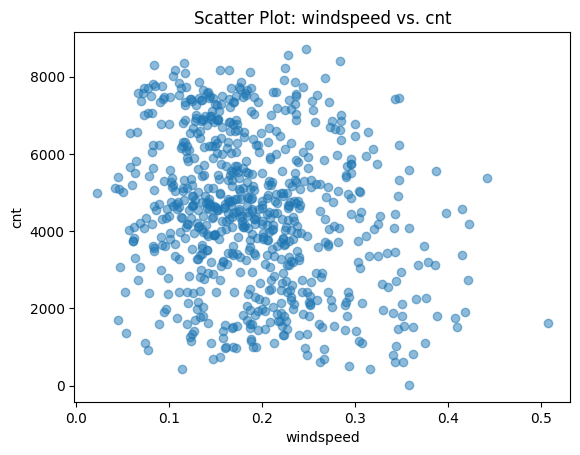

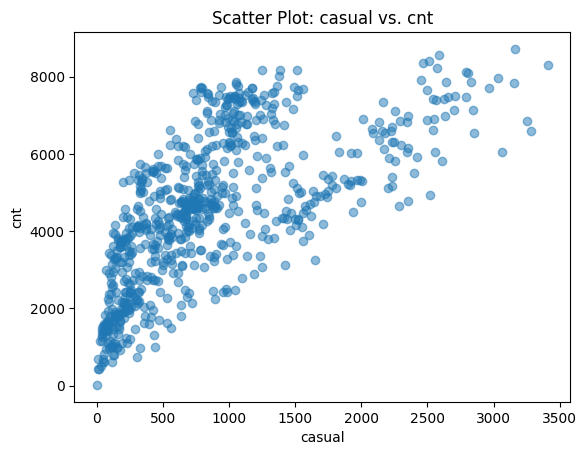

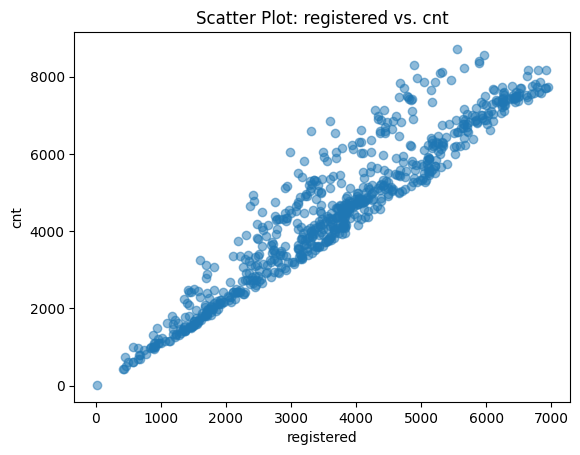

In [2]:
selected_features = ['instant','yr','mnth', 'holiday',  'weekday','workingday', 'weathersit','temp' ,'atemp','hum','windspeed','casual','registered']


for feature in selected_features:
    plt.scatter(bikers_df[feature], bikers_df['cnt'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.title(f'Scatter Plot: {feature} vs. cnt')
    plt.show()

Steps involved in Linear Regression:

1.  Design matrix X is created with features and an intercept.
2.  The coefficients B are calculated using the normal equation.
3.  Predicted y values (predicted_y) are obtained.
4.  SSR and SSt are calculated to assess model performance.
5.  R-squared is computed to understand how well the model explains y variance.


In [3]:
# Create the design matrix X
X = bikers_df[["temp"]].copy()
X["intercept"] = 1

# Rearrange columns
X = X[["intercept", "temp"]]

# Target variable y
y = bikers_df["cnt"]
X,y


(     intercept      temp
 0            1  0.344167
 1            1  0.363478
 2            1  0.196364
 3            1  0.200000
 4            1  0.226957
 ..         ...       ...
 726          1  0.254167
 727          1  0.253333
 728          1  0.253333
 729          1  0.255833
 730          1  0.215833
 
 [731 rows x 2 columns],
 0       985
 1       801
 2      1349
 3      1562
 4      1600
        ... 
 726    2114
 727    3095
 728    1341
 729    1796
 730    2729
 Name: cnt, Length: 731, dtype: int64)

In [4]:
# Transpose the design matrix X
X_T = X.T

# Calculate the coefficients using the normal equation approach
# B = (X^T * X)^(-1) * X^T * y
B = np.linalg.inv(X_T @ X) @ X_T @ y

# Set the index of the coefficients to match the column names of X
B.index = X.columns
B
# Calculate the predicted values y_hat using the linear regression model
predicted_y = X @ B

# Display the predicted y values
predicted_y

0      3500.155357
1      3628.394108
2      2518.638497
3      2542.784119
4      2721.797738
          ...     
726    2902.491457
727    2896.953105
728    2896.953105
729    2913.554880
730    2647.926480
Length: 731, dtype: float64

In [5]:
# Calculate the Sum of Squares Residual (SSR)
# SSR measures the difference between the predicted and actual y values
SSR = ((y - predicted_y) ** 2).sum()

# Calculate the Total Sum of Squares (SSt)
# SSt measures the total variation of the actual y values around the mean
SSt = ((y - y.mean()) ** 2).sum()

# Calculate the Coefficient of Determination (R-squared)
# R-squared measures the proportion of variance in y explained by the model
R2 = 1 - (SSR / SSt)

# Display the calculated R-squared value
R2

0.3937487313729241


1. LinearRegression class is imported to create a model.
2. Model instance (lr) is created and fitted using "temp" to predict "cnt".
3. Scatter plot is generated, showing data points.
4. Regression line is plotted using the model's predictions.
5. Labels, title, and legend are added for clarity.
6. The combined plot is displayed using plt.show().


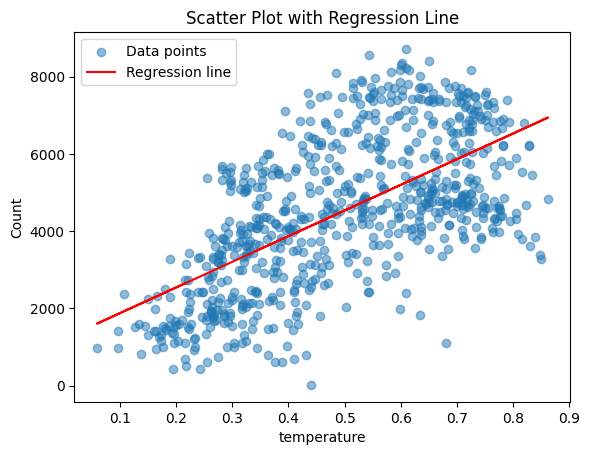

In [6]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression instance
lr = LinearRegression()

# Fit the linear regression model using the "temp" feature to predict "cnt"
lr.fit(bikers_df[["temp"]], bikers_df[["cnt"]])
lr.intercept_
# Fit the linear regression model
lr = LinearRegression()
lr.fit(bikers_df[["temp"]], bikers_df[["cnt"]])

# Scatter plot
plt.scatter(bikers_df["temp"], bikers_df["cnt"], alpha=0.5, label="Data points")

# Plot the regression line
plt.plot(bikers_df["temp"], lr.predict(bikers_df[["temp"]]), color='red', label="Regression line")

plt.xlabel("temperature")
plt.ylabel("Count")
plt.title("Scatter Plot with Regression Line")
plt.legend()
plt.show()


Using both approaches in the same analysis isn't required. Your choice depends on your objectives:

1. If you aim to grasp the underlying concepts of linear regression, the matrix version is invaluable for learning the mathematical foundations and mechanics.

2. If your priority is efficient and practical implementation, especially with real-world datasets, the LinearRegression class is highly convenient. It comes with built-in functionalities for handling various aspects of linear regression.